# Trabalho 03: Naive Bayes Bayesiano
Andreza Fernandes de Oliveira - 486243


### Importações

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from IPython.display import Image
%matplotlib inline

path = "/content/drive/MyDrive/Acadêmico/UFC/Mestrado/Disciplinas/2020.2/Tópicos Especiais em Lógica II/TRABALHOS/Trabalho 03/"

## 01. Implementação do modelo de Naive Bayes Bayesiano

### a. Leitura do dado e tratamento

In [11]:
data = pd.read_csv(path+"votesDataset.csv", header=None, skiprows=1)
data = data.rename(columns={0: 'partido'})
data.head(10)

,partido,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1
5,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,1
6,democrat,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1
8,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1
9,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1


In [12]:
# Tamanho do dado
data.shape

(435, 17)

In [62]:
# Verificando a quantidade por partido
classes = data["partido"].unique()
classes, data["partido"].value_counts()

(array(['republican', 'democrat'], dtype=object), democrat      267
 republican    168
 Name: partido, dtype: int64)

In [27]:
# Separação dos conjuntos de treino e teste
X = data.iloc[:, 1:17]
y = data.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(348, 16) (87, 16) (348,) (87,)


## b. Implementação do Naive Bayes Bayesiano

### Definição das Prioris

Escolhemos a priori fatorada para os parâmetros $p(θ)$:

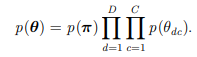

In [46]:
Image(filename=path+'/imgs/formula_priori.png') 

Para cada atributo de cada classe ($\theta_{dc}$), assumimos uma distribuição Beta, onde os valores são ruídos gerados aleatoriamente.

$p(θ_dc) = Beta(θ_dc|a, b)$.

In [44]:
n_classes = len(data['partido'].unique())
n_features = data.shape[1] - 1

def generate_random_values(num_attr):
    return np.array([np.random.rand() for _ in range(num_attr)])

alpha = [ 1 for _ in range(n_classes)] # seguindo o Bishop
a = np.array([generate_random_values(n_features) for _ in range(n_classes)])
b = np.array([generate_random_values(n_features) for _ in range(n_classes)])

a, b

(array([[0.88091548, 0.28546425, 0.31660994, 0.82567175, 0.79893866,
         0.12980725, 0.93569783, 0.4780888 , 0.01447185, 0.72517059,
         0.29825878, 0.61455251, 0.2113174 , 0.77804752, 0.45926296,
         0.20104118],
        [0.27860924, 0.80506306, 0.13967751, 0.91281415, 0.40062079,
         0.28472217, 0.67126161, 0.24725216, 0.52654557, 0.11440437,
         0.36092344, 0.82948771, 0.02658431, 0.418362  , 0.1578105 ,
         0.03292856]]),
 array([[0.57785613, 0.76929267, 0.09062118, 0.37165579, 0.83280567,
         0.96056435, 0.3435167 , 0.37273071, 0.2881906 , 0.5459562 ,
         0.2583854 , 0.72769103, 0.71106265, 0.12653429, 0.91814588,
         0.66432118],
        [0.55717068, 0.6345871 , 0.17893797, 0.44715688, 0.44414428,
         0.38222382, 0.55984133, 0.06097676, 0.41425213, 0.49199059,
         0.29700185, 0.56215765, 0.50152293, 0.89167986, 0.83632021,
         0.30039359]]))

Para a distribuição de Dirichlet $p(π) = Dir(π|α)$, atribuímos um valor alpha de relevância para cada classe. Assumimos que ambas tem relevância igual.

In [57]:
alpha = [ 1 for _ in range(n_classes)] # seguindo o Bishop

### Definição das posterioris

Agora, definimos As posteriori seguindo os modelos beta-binomial e
Dirichlet-multinomial:



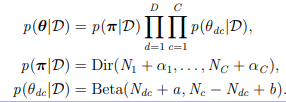

In [58]:
Image(filename=path+'/imgs/formulas_posteriori.png') 

Onde, temos:

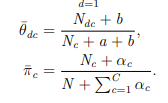

In [61]:
Image(filename=path+'/imgs/formulas_O_e_pi.png') 

In [65]:
thetas = []
pis = []

for index, classe in enumerate(classes):
    X_c = x_train[y_train == classe]
    
    N_c = X_c.shape[0]
    N_dc = np.sum(X_c, axis = 0)
    
    a_c = a[index,:]
    b_c = b[index,:]
    
    theta_dc = (N_dc + b_c)/(N_c + a_c + b_c)
    pi_c = (N_c + alpha[index])/(x_train.shape[0] + sum(alpha))
    
    thetas.append(theta_dc)
    pis.append(pi_c)

thetas, pis

([1     0.191955
  2     0.432939
  3     0.131657
  4     0.965081
  5     0.958170
  6     0.912160
  7     0.284522
  8     0.213076
  9     0.096780
  10    0.575290
  11    0.110924
  12    0.793161
  13    0.860709
  14    0.283722
  15    0.093354
  16    0.708404
  dtype: float64, 1     0.583269
  2     0.445466
  3     0.871570
  4     0.058613
  5     0.252280
  6     0.488419
  7     0.789516
  8     0.818998
  9     0.686108
  10    0.460723
  11    0.483313
  12    0.148604
  13    0.304931
  14    0.790785
  15    0.631321
  16    0.961989
  dtype: float64], [0.3942857142857143, 0.6057142857142858])

### Predição 

Agora que temos os   $θ_dc$  e  $π_c$, vamos a predição! Bem, como definido no slide, podemos obter o rótulo de um padrão seguindo a fórmula a seguir. Aqui obtemos a probabilidade de pertence para cada classe.

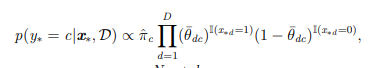

In [66]:
Image(filename=path+'/imgs/calculo_do_y.png')

Daí, a gente obtém o y final vendo qual classe tem maior probabilidade!

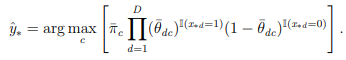

In [67]:
Image(filename=path+'/imgs/calculo_max_prob_do_y.png') 

In [77]:

predictions = []

for index, x in x_test.iterrows():
    probabilitys = []

    for c, theta, pi in zip(classes, thetas, pis):
        y_pred = pi * np.prod((theta ** x) * (1 - theta) ** (1 - x))
        probabilitys.append(y_pred)

    predictions.append(classes[np.argmax(probabilitys)])

predictions

['democrat',
 'democrat',
 'republican',
 'republican',
 'republican',
 'republican',
 'democrat',
 'republican',
 'republican',
 'republican',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'republican',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'republican',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'democrat',
 'republican',
 'democr

In [78]:
len(y_test), len(predictions)

(87, 87)

### Visualização da Matriz de Confusão

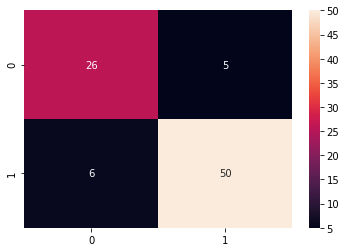

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions, labels=classes)
sns.heatmap(confusion_matrix, annot=True)

### Bibliografia

- Slides professor
- Pattern Recognition and Machine Learning, BISHOP, Christopher M.